## Weather Temperature Analytics
The data comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! The data used is from the Ann Arbor Michigan location and this is stored in the file: `fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)
* Data can be useful in determine the minimum and maximum temperature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('files/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
# In this code cell, transform the Data_Value column
df.Data_Value = df.Data_Value / 10
maximum = df[df['Element'] == 'TMAX'].reset_index(drop=True)
minimum = df[df['Element'] == 'TMIN'].reset_index(drop=True)
maximum.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00200032,2008-05-26,TMAX,27.8
2,USC00205563,2005-11-11,TMAX,13.9
3,USC00200230,2014-02-27,TMAX,-10.6
4,USW00014833,2010-10-01,TMAX,19.4


In [4]:
# dropping any row with February 29 in the maximum temperature dataframe
pattern = '\w{4}-02-29'
dropped_max = maximum['Date'].str.contains(pattern)
maximum = maximum[~dropped_max]

# dropping any row with February 29 in the minimum temperature dataframe
dropped_min = minimum['Date'].str.contains(pattern)
minimum = minimum[~dropped_min]

# create a DataFrame of maximum temperature by date(2005-2015)
max_by_date = maximum.groupby('Date').max()

# create a DataFrame of minimum temperatures by date(2005-2015)
min_by_date = minimum.groupby('Date').min()

max_by_date.head()

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00094889,TMAX,15.6
2005-01-02,USW00094889,TMAX,13.9
2005-01-03,USW00094889,TMAX,13.3
2005-01-04,USW00094889,TMAX,3.9
2005-01-05,USW00094889,TMAX,3.3


In [5]:
pattern = '\w{4}-02-29'
dropped_max = maximum['Date'].str.contains(pattern)
maximum = maximum[~dropped_max]

# dropping any row with February 29 in the minimum temperature dataframe
dropped_min = minimum['Date'].str.contains(pattern)
minimum = minimum[~dropped_min]

# create a DataFrame of maximum temperature by date(2005-2015)
max_by_date = maximum.groupby('Date').max()

# create a DataFrame of minimum temperatures by date(2005-2015)
min_by_date = minimum.groupby('Date').min()

# reset index to default index
min_by_date = min_by_date.reset_index()
max_by_date = max_by_date.reset_index()

# extracting the maximum temperature at 2015
pattern = '2015-\w{2}-\w{2}'
contained = max_by_date['Date'].str.contains(pattern)
max_temp_2015 = max_by_date[contained] # maximum temperature for 2015 dataframe

# extracting the maximum temperature at 2015
contained1 = min_by_date['Date'].str.contains(pattern)
min_temp_2015 = min_by_date[contained1] # minimum temperature for 2015 dataframe

# resetting index to default index for 2015 dataframe
min_temp_2015.reset_index(drop=True, inplace=True)
max_temp_2015.reset_index(drop=True, inplace=True)

# removing the maximum value in 2015
pattern = '2015-\w{2}-\w{2}'
dropped_max = max_by_date['Date'].str.contains(pattern)
max_by_date = max_by_date[~dropped_max] # maximum temperature for 2005-2014 dataframe

# removing the minimum value in 2015
dropped_min = min_by_date['Date'].str.contains(pattern)
min_by_date = min_by_date[~dropped_min] # minimum temperature for 2005-2014 dataframe

# creating a day and month column for TMAX 
max_by_date['Date'] = pd.to_datetime(max_by_date['Date'])
max_by_date['Month'] = pd.DatetimeIndex(max_by_date['Date']).month
max_by_date['Day'] = pd.DatetimeIndex(max_by_date['Date']).day

# grouping the dataframe by the 'month' and 'day' column(maximum temperature)
max_by_date = max_by_date.groupby(['Month', 'Day']).max()

# creating a day and month column for TMIN
min_by_date['Date'] = pd.to_datetime(min_by_date['Date']) # converting the date to datetime format
min_by_date['Month'] = pd.DatetimeIndex(min_by_date['Date']).month # month column
min_by_date['Day'] = pd.DatetimeIndex(min_by_date['Date']).day # day column

# grouping the dataframe by the 'month' and 'day' column(minimum temperature)
min_by_date = min_by_date.groupby(['Month', 'Day']).min()

# reset the column into default index 
max_by_date.reset_index(drop=True, inplace=True)
min_by_date.reset_index(drop=True, inplace=True)

max_by_date.head(50)

,Date,ID,Element,Data_Value
0,2014-01-01,USW00094889,TMAX,15.6
1,2014-01-02,USW00094889,TMAX,13.9
2,2014-01-03,USW00094889,TMAX,13.3
3,2014-01-04,USW00094889,TMAX,10.6
4,2014-01-05,USW00094889,TMAX,12.8
5,2014-01-06,USW00094889,TMAX,18.9
6,2014-01-07,USW00094889,TMAX,21.7
7,2014-01-08,USW00094889,TMAX,19.4
8,2014-01-09,USW00094889,TMAX,17.8
9,2014-01-10,USW00094889,TMAX,10.0


In [6]:
min_by_date.shape
max_by_date.shape

(365, 4)

In [7]:
# maximum temperature data value in 2015 greater than the maximum temperature from 2005 to 2014
max_temp_2015_greater = max_temp_2015[max_temp_2015['Data_Value'] > max_by_date['Data_Value']]

# minimum temperature data value in 2015 greater than the minimum temperature from 2005 to 2014
min_temp_2015_lesser = min_temp_2015[min_temp_2015['Data_Value'] < min_by_date['Data_Value']]

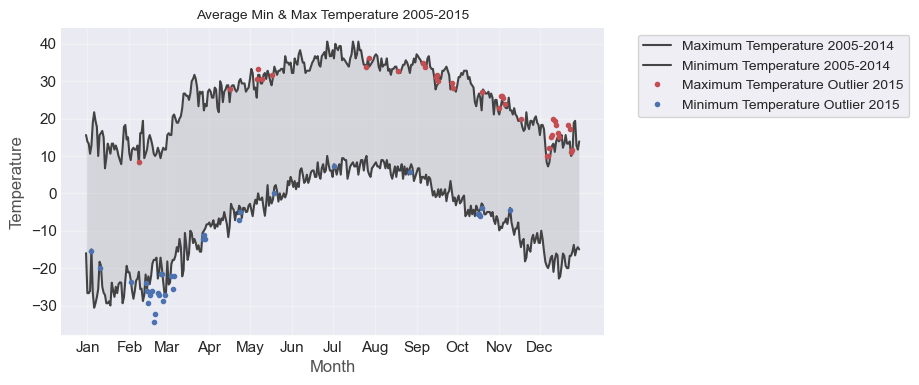

In [18]:
# Now let's plot line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot only the daily 
# 2015 temperatures that exceeded those values.

import matplotlib.pyplot as plt
from calendar import month_abbr
import matplotlib.axis as ax
import matplotlib.dates as mdates

# create a figure
fig = plt.figure(figsize=(7,4))

xticks = [1,32,60,91,121,152,182,213,244,274,305,335]# xticks 
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

y_max_2015 = max_temp_2015_greater['Data_Value']# maximum temperature in 2015 y-axis
y_min_2015 = min_temp_2015_lesser['Data_Value']# minimum temperature in 2015 y-axis
y_max =  max_by_date['Data_Value']
y_min = min_by_date['Data_Value']

plt.plot(y_max, color='k', alpha=0.8)
plt.plot(y_min, color='k',alpha=0.8)
plt.plot( y_max_2015, '.',color='r')
plt.plot( y_min_2015, '.')

ax1 = plt.gca()
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels)

for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
    
ax1.tick_params(axis=u'both', which=u'both', length=0)
ax1.fill_between(y_min.index,y1=y_max, y2=y_min,facecolor='grey', alpha=0.2)

ax1.set_xlabel('Month', alpha=0.8)
ax1.set_ylabel('Temperature', alpha=0.8)
ax1.set_title('Average Min & Max Temperature 2005-2015', fontsize=10)

legend=ax1.legend(labels=['Maximum Temperature 2005-2014', 'Minimum Temperature 2005-2014', 
                                 'Maximum Temperature Outlier 2015', 'Minimum Temperature Outlier 2015'],
                  fontsize=10, bbox_to_anchor=(1.05,1), loc='upper left')
    
plt.grid(True, alpha=0.3)
plt.show()
sns.set()